In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath("../../"))

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [2]:
from brmspy.brms import bf
from brmspy import brms

In [ ]:
with brms.manage(environment_name="mrp") as ctx:
    ctx.install_brms(use_prebuilt=True)
    ctx.install_rpackage("MCMCglmm")

In [ ]:
status = brms.status()

REMOTE CALL


In [ ]:
status

RuntimeStatus(active_runtime=PosixPath('/Users/sebastian/.brmspy/runtime/macos-arm64-r4.5-0.2.0'), is_activated=True, system=SystemInfo(os='macos', arch='arm64', r_version=(4, 5, 2), fingerprint='macos-arm64-r4.5', glibc_version=None, clang_version=(17, 0), gxx_version=None, has_rtools=False), can_use_prebuilt=True, prebuilt_available=True, compatibility_issues=(), installed_runtimes=(PosixPath('/Users/sebastian/.brmspy/runtime/test-x86_64-r4.3-0.1.0'), PosixPath('/Users/sebastian/.brmspy/runtime/macos-arm64-r4.5-0.2.0')), brms_version='2.23.0', cmdstanr_version='0.9.0', rstan_version='2.32.7')

In [ ]:
data = brms.get_brms_data("epilepsy")

REMOTE CALL


In [ ]:
r1 = brms.brm(
    formula="count ~ zAge + zBase * Trt + (1|patient)",
    data=data,
    family="poisson",
    warmup=500,
    iter=1000,
    chains=4
)


REMOTE CALL


[brmspy][worker_main] Fitting model with brms (backend: cmdstanr)...
[R]: Compiling Stan program...
  


[R]: Start sampling
  


Running MCMC with 4 chains, at most 2 in parallel...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 9

[brmspy][encode][WARNING] PickleCodec encoding large object: type=<class 'brmspy.types.FitResult'>, size=6.47 MB


In [ ]:
brms.summary(r1)

[brmspy][encode][WARNING] PickleCodec encoding large object: type=<class 'brmspy.types.FitResult'>, size=6.47 MB


REMOTE CALL


 Family: poisson 
  Links: mu = log 
Formula: count ~ zAge + zBase * Trt + (1 | patient) 
   Data: structure(list(Age = c(31, 30, 25, 36, 22, 29, 31, (Number of observations: 236) 
  Draws: 4 chains, each with iter = 1000; warmup = 500; thin = 1;
         total post-warmup draws = 2000

Multilevel Hyperparameters:
~patient (Number of levels: 59) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.59      0.07     0.46     0.76 1.00      429      965

Regression Coefficients:
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     2.05      0.26     1.52     2.55 1.01      393      716
zAge          0.09      0.08    -0.07     0.25 1.02      296      546
zBase         0.63      0.27     0.07     1.16 1.02      285      624
Trt          -0.28      0.16    -0.60     0.04 1.01      410      663
zBase:Trt     0.06      0.17    -0.27     0.40 1.02      307      660

Draws were sampled using sample(hmc). For each parameter

In [ ]:
import arviz as az

<Axes: xlabel='count'>

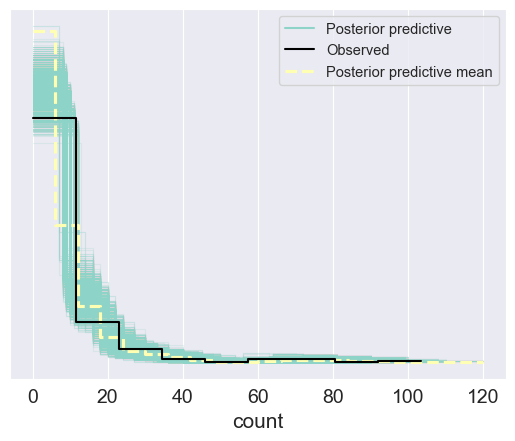

In [ ]:
az.plot_ppc(r1.idata)